In [1]:
from sklearn.datasets import fetch_olivetti_faces
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF, PCA, FastICA
import numpy as np
%matplotlib inline

In [2]:
def remove_ticks(ax):
    ax.set_xticks([])
    ax.set_yticks([])
    
def plot_bases(V):
    t = int(np.sqrt(V.shape[0]))
    fig, axes = plt.subplots(t,t, figsize=(14,14));
    fig.suptitle("bases")
    for i, ax in enumerate(axes.flatten()):
        remove_ticks(ax)
        ax.imshow(V[i].reshape(64,64), cmap="gray");

def plot_faces(X, U, V, n_faces=3):
    n_faces = 3
    t = int(np.sqrt(V.shape[0]))

    selected_faces = np.random.choice(range(400), size=n_faces)

    #plotting weights
    fig, axes = plt.subplots(1,n_faces,figsize=(8,4));
    fig.suptitle("weights")
    for i, ax in enumerate(axes.flatten()):
        n = selected_faces[i] ;
        cax = ax.imshow(U[n].reshape(8,8), cmap="gray");
        remove_ticks(ax);

    fig, axes = plt.subplots(n_faces,2,figsize=(8,12));

    for i, row_axes in enumerate(axes):
        n = selected_faces[i]
        reconst_face = (U[n] @ V)
        remove_ticks(row_axes[0]);
        remove_ticks(row_axes[1]);
        row_axes[0].set_title("original");
        row_axes[1].set_title("reconstructed");
        row_axes[0].imshow(X[n].reshape(64,64),cmap="gray");
        row_axes[1].imshow(reconst_face.reshape(64,64),cmap="gray");

In [3]:
dataset = fetch_olivetti_faces(shuffle=True)
X = dataset.data

In [5]:
print(X.shape)
print(V.shape)

(400, 4096)
(64, 4096)


CPU times: user 27.9 s, sys: 415 ms, total: 28.3 s
Wall time: 15.4 s


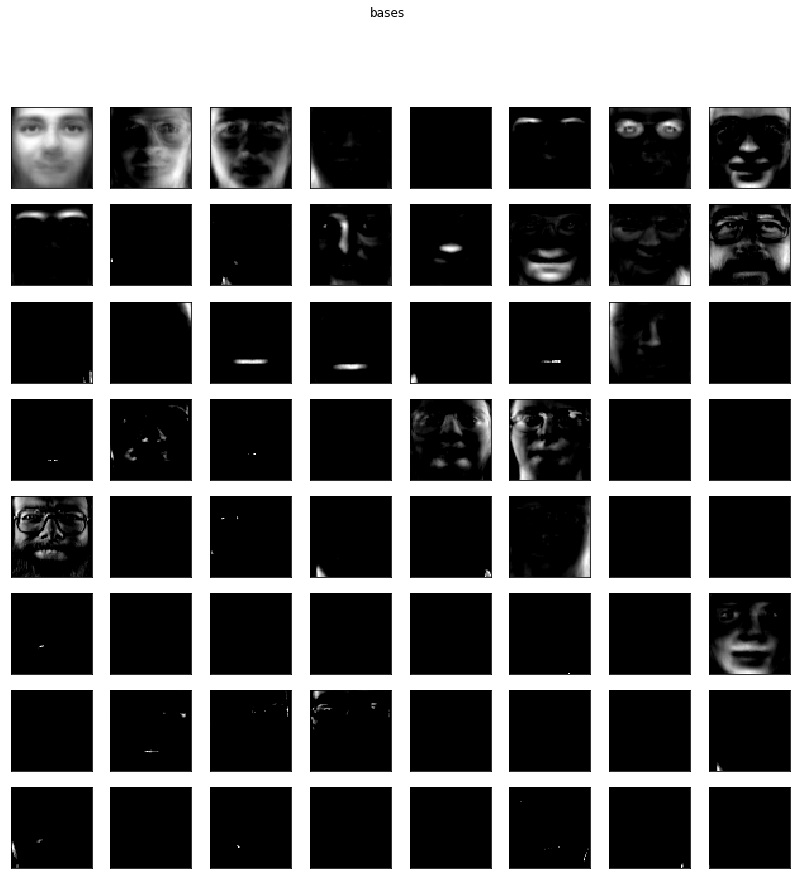

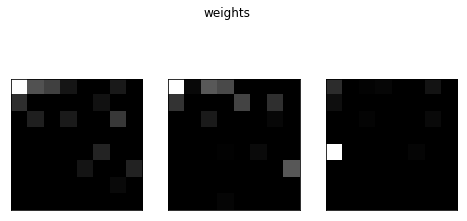

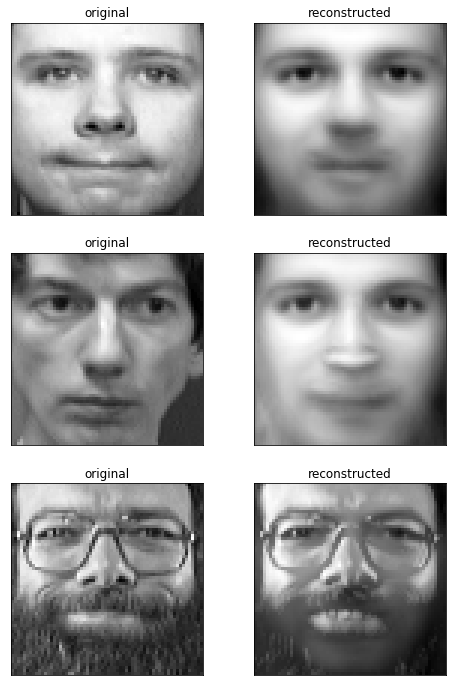

In [4]:
model = NMF(n_components=64, l1_ratio=1, alpha=1)
%time U = model.fit_transform(X)
V = model.components_
plot_bases(V)
plot_faces(X, U, V, n_faces=3)

CPU times: user 323 ms, sys: 167 ms, total: 490 ms
Wall time: 147 ms


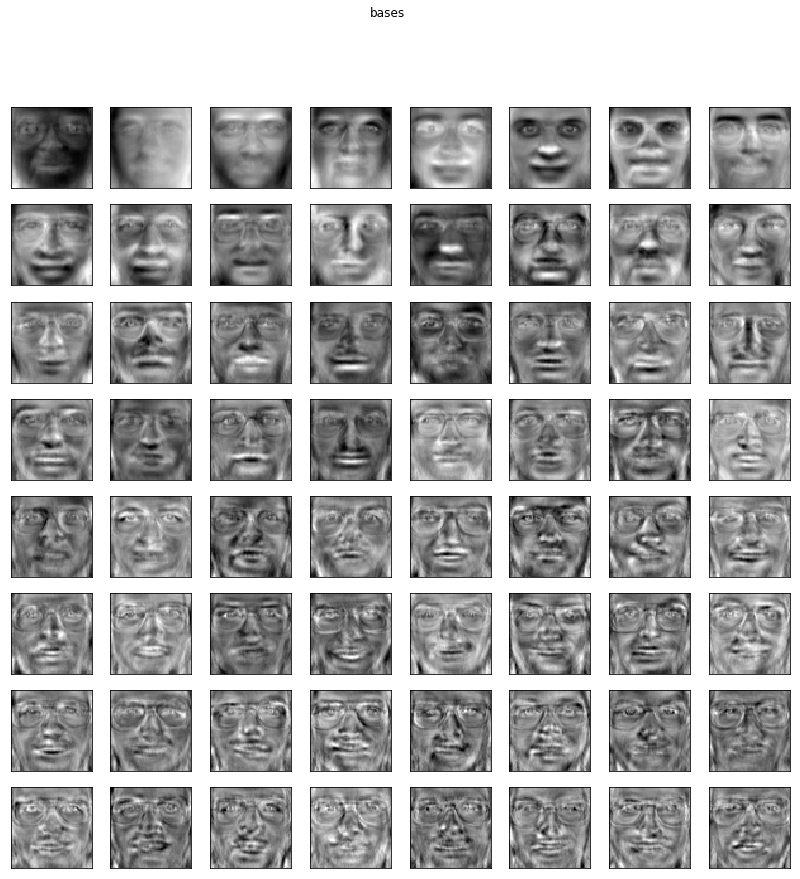

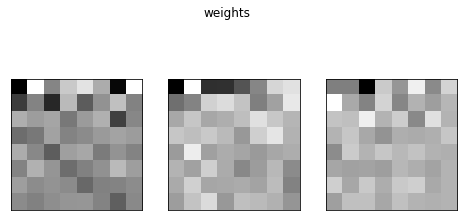

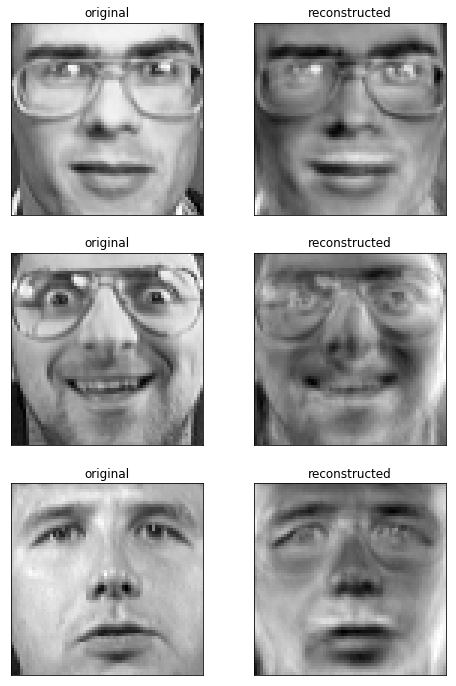

In [204]:
model = PCA(n_components=64)
%time U = model.fit_transform(X)
V = model.components_
plot_bases(V)
plot_faces(X, U, V, n_faces=3)

CPU times: user 951 ms, sys: 1.23 s, total: 2.18 s
Wall time: 728 ms


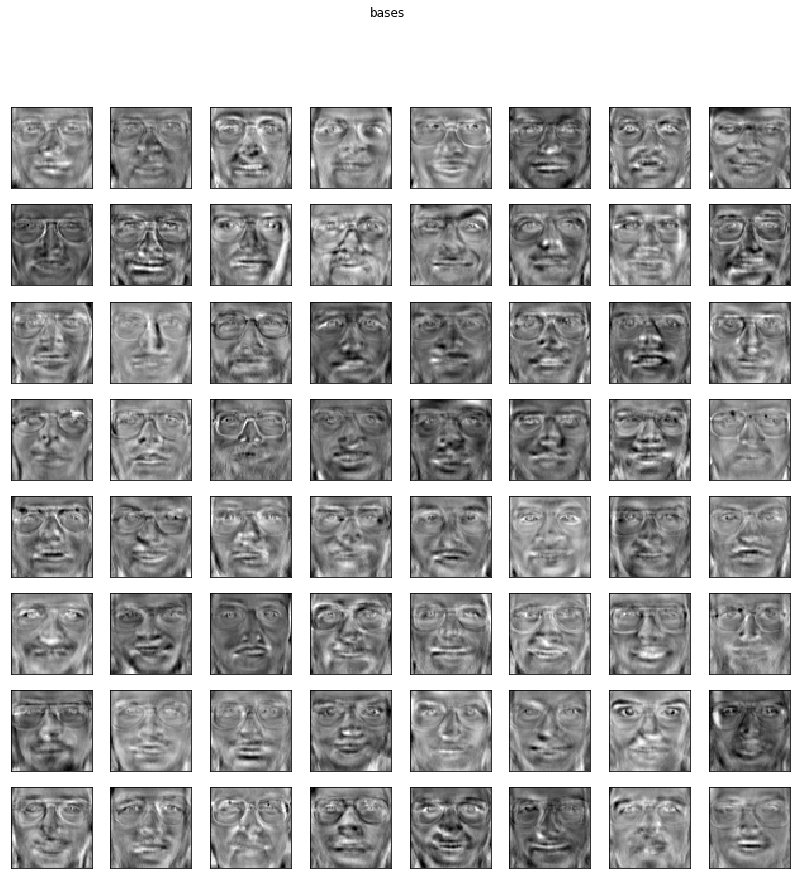

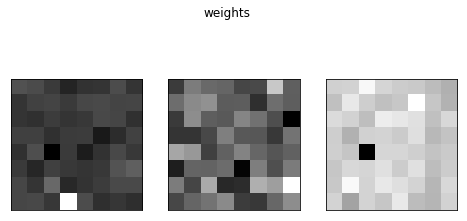

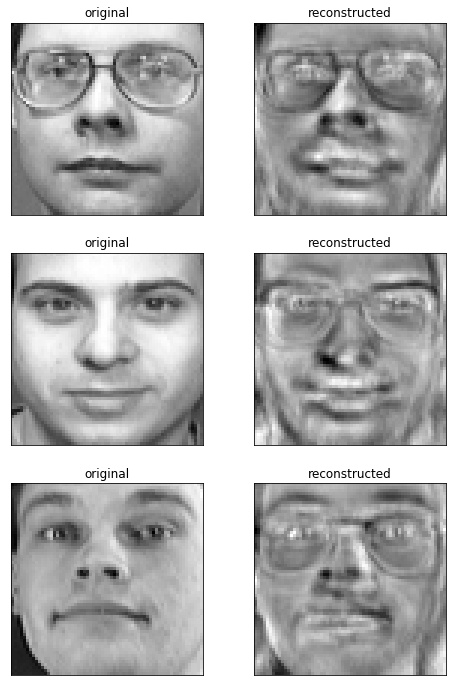

In [205]:
model = FastICA(n_components=64)
%time U = model.fit_transform(X)
V = model.components_
plot_bases(V)
plot_faces(X, U, V, n_faces=3)